## Morse presentation of CW-complexes

In [1]:
# load package from Finite_Spaces
!sage --preparse Finite_Spaces/Homotopy.sage
!mv Finite_Spaces/Homotopy.sage.py Finite_Spaces/Homotopy.py
!sage --preparse Finite_Spaces/Deformations.sage
!mv Finite_Spaces/Deformations.sage.py Finite_Spaces/Deformations.py
!sage --preparse Finite_Spaces/Presentations.sage
!mv Finite_Spaces/Presentations.sage.py Finite_Spaces/Presentations.py
!sage --preparse Finite_Spaces/Morse.sage
!mv Finite_Spaces/Morse.sage.py Finite_Spaces/Morse.py
!sage --preparse Finite_Spaces/Colorings.sage
!mv Finite_Spaces/Colorings.sage.py Finite_Spaces/Colorings.py

from Finite_Spaces.Presentations import *
from Finite_Spaces.Morse         import *

We next present a way to obtain the *standard presentation of the Morse CW-complex* $K_M$ associated to a regular CW complex $K$ and a Morse function $f\colon K\to \mathbb{R}$.

### Combinatorial CW-complexes

A CW-complex $K$ of dimension 2 is called **combinatorial** if
for each 2-cell $e^2$, its attaching map $\varphi:S^1\to K^{(1)}$, seen as a  cellular map by assigning a CW-structure on $S^1$, is a **combinatorial map** (that is, $\varphi$ sends each open
1-cell of $S^1$ either homeomorphically onto an open 1-cell of $K$ or it collapses it to a 0-cell of $K$). Thus, *one can think of the attaching map of a 2-cell in a combinatorial complex of dimension 2
just as the ordered list of oriented 1-cells*.

Let's compute the standard presentation associated to the following combinatorial complex (and acyclic matching).

<img src='Pictures/matching.png' width="400" height="100"> 

In [19]:
#dictionary of attaching maps of 2-cells

att_2 = {
      'c1': [('x2', -1),  ('x13', 1), ('x3', -1)],
      'c2': [('x13', -1), ('x12', 1), ('x4', -1)],
      'c3': [('x12', -1), ('x11', 1), ('x5', -1)],
      'c4': [('x11', -1), ('x10', 1), ('x6', -1)],
      'c5': [('x10', -1), ('x9', 1),  ('x4', 1)],
      'c6': [('x9', -1),  ('x8', 1),  ('x3', -1)],
      'c7': [('x8', -1),  ('x7', 1),  ('x6', 1)],
      'c8': [('x7', -1),  ('x2', 1),  ('x5', 1)],
      }

### Morse presentation

In [20]:
# matching
M = [('2', 'x2'), ('3', 'x3'), ('5', 'x5'), ('x13', 'c2'), ('x12', 'c3'), ('x11', 'c4'), ('x10', 'c5'), ('x9', 'c6'), ('x8', 'c7'), ('x7', 'c8')]

In [21]:
# critical cells of dimension 2
critical_dim_2 = ['c1']
critical_dim_1 = ['x4', 'x6']

In [22]:
att_2_M = attaching_Morse(att_2, M, critical_dim_2)
att_2_M

{'c1': [('x6', 1), ('x4', 1), ('x6', -1), ('x4', -1)]}

In [23]:
att_to_group(att_2_M, critical_dim_1)

Finitely presented group < a0, a1 | a1*a0*a1^-1*a0^-1 >

### Random acyclic matchings

In [7]:
faces_2 = dict((key, [att_2[key][i][0] for i in range(3)]) for key in att_2.keys())

In [8]:
faces_1 = {
        'x2': ['1', '2'],
        'x3': ['1', '3'],
        'x4': ['1', '3'],
        'x5': ['1', '5'],
        'x6': ['1', '5'],
        'x7': ['2', '5'],
        'x8': ['2', '1'],
        'x9': ['2', '3'],
        'x10': ['2', '1'],
        'x11': ['2', '5'],
        'x12': ['2', '1'],
        'x13': ['2', '3'],
        }

In [9]:
X = Poset(faces_1 | faces_2).dual()

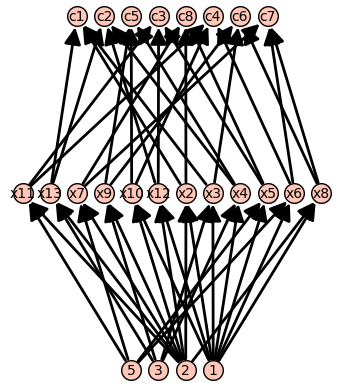

In [10]:
X.plot()

In [11]:
M2 = spanning_matching(X)

In [12]:
critical = critical_by_level(X, M2)
critical

[['3'], ['x10', 'x8'], ['c5']]

In [13]:
att_to_group(attaching_Morse(att_2, M2, critical[2]), critical[1])

Finitely presented group < a0, a1 | a0^-1*a1^-1*a0*a1^-1 >

### Simplicial complexes

In [27]:
projective = simplicial_complexes.RealProjectiveSpace(2)

<img src='Pictures/projective.png' width="400" height="100"> 

In [28]:
# attaching map of 2-simplices from a simplicial complex

# here we assume that the vertices are labeled (and totally ordered) and that the orientation of the simplices is induced by the order.
two_simplices = projective.faces()[2]
att_2 = {}
for simplex in two_simplices:
    att_2[tuple(simplex)] = [((simplex[0], simplex[1]), 1), ((simplex[1], simplex[2]), 1), ((simplex[0], simplex[2]), -1)]

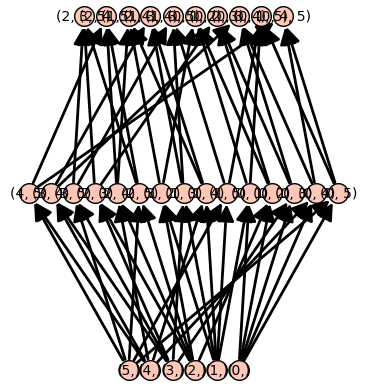

In [29]:
X = projective.face_poset()
X.show()

In [42]:
M = spanning_matching(X)

In [43]:
critical_cells = critical_by_level(X, M)
Morse_presentation = att_to_group(attaching_Morse(att_2, M, critical_cells[2]), critical_cells[1])
Morse_presentation

Finitely presented group < a | a^2 >